LIMPIEZA DE DATOS PROYECTO BI

Incluir paquetes

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.impute import SimpleImputer

Cargar data

In [66]:
data = pd.read_csv('./Data/NoProcesada/Relacional/sede.csv', sep=';', quotechar='"')

MUESTRA DE DATOS

In [53]:
data.head()

,id_sede,nombre_sede,direccion_sede
0,1,Rodríguez LLC,Avenida carrera 9ª # 11-32 Local 824 130524 Sa...
1,2,bermúdez-Hernández,NaN
2,3,"Castrillón, Torres and Morales","Calle 11 # 56-90 Este 521019 Imués, Nariño"
3,ERROR-ID,Muñoz PLC,Cl. 180 Bis # 13B-6 Sur Bodega 497 136525 Tala...
4,5,Hoyos-Velásquez,Cl. 4ª # 27-5 Este Torre 5 apartamento 824 502...


Verificar estructura

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_sede         99 non-null     object
 1   nombre_sede     97 non-null     object
 2   direccion_sede  95 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


Valores nulos

In [55]:
print(f"Nombre columnas {data.columns}")
print(data.isnull().sum())

Nombre columnas Index(['id_sede', 'nombre_sede', 'direccion_sede'], dtype='object')
id_sede           1
nombre_sede       3
direccion_sede    5
dtype: int64


In [56]:
data.describe()

,id_sede,nombre_sede,direccion_sede
count,99,97,95
unique,99,97,93
top,1,Rodríguez LLC,"Av. Omar Becerra # 9-4 Sur 731145 Palocabildo,..."
freq,1,1,2


Visualizar el tamaño del dataset

In [57]:
data.shape

(100, 3)

Cambiar tipos de datos

In [58]:
data['id_sede'] = pd.to_numeric(data['id_sede'], errors='coerce')
data = data.dropna(subset=["id_sede"])

data["id_sede"] = data["id_sede"].astype("int64")
print("Valores nulos después de limpiar id_sede:")
print(data["id_sede"].isnull().sum())

Valores nulos después de limpiar id_sede:
0


OUTLIERS - Modo Grafico

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32216\2956398687.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


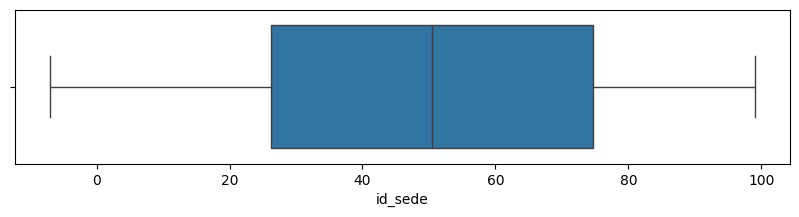

In [59]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')
    
cols=data.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data[cols], x=col)

OUTLIERS - Calculado

IRQ = Rango Intercuartirico

In [60]:
outliers={}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IRQ = Q3 - Q1
  LI = Q1 - 1.5 * IRQ
  LS = Q3 + 1.5 * IRQ
  outliers[col] = data[(data[col] < LI) | (data[col] > LS)][col]

  print(f'{col}: {len(outliers[col])} outliers')
print(outliers)

id_sede: 0 outliers
{'id_sede': Series([], Name: id_sede, dtype: int64)}


In [61]:
data.mean
data.std

<bound method DataFrame.std of     id_sede                     nombre_sede  \
0         1                   Rodríguez LLC   
1         2              bermúdez-Hernández   
2         3  Castrillón, Torres and Morales   
4         5                 Hoyos-Velásquez   
5         6     VÉLEZ, ACOSTA AND RODRÍGUEZ   
..      ...                             ...   
94       95                  Quintero-Prada   
95       96                González-Sánchez   
96       97       Camacho, Mejía and Castro   
97       98                  Vallejo-Romero   
98       99         Figueroa, Niño and Ríos   

                                       direccion_sede  
0   Avenida carrera 9ª # 11-32 Local 824 130524 Sa...  
1                                                 NaN  
2          Calle 11 # 56-90 Este 521019 Imués, Nariño  
4   Cl. 4ª # 27-5 Este Torre 5 apartamento 824 502...  
5     Carrera 40 # 4-17 Local 7 192037 Corinto, Cauca  
..                                                ...  
94  Carrera 

<Axes: xlabel='id_sede', ylabel='Count'>

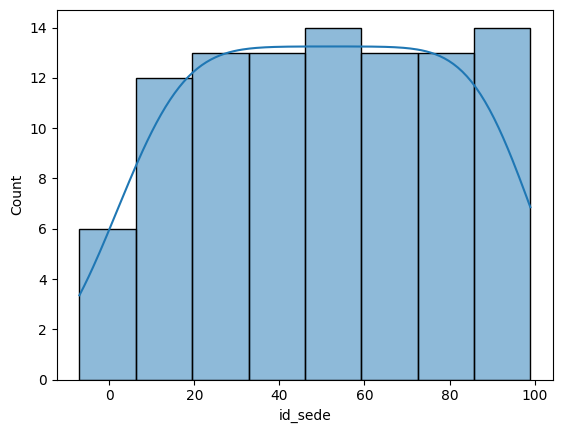

In [62]:
sns.histplot(data=data, x='id_sede', kde=True)

In [63]:
# data.isna().sum()
# isna, traer valores nulos
data.isna().mean()*100

id_sede           0.000000
nombre_sede       3.061224
direccion_sede    5.102041
dtype: float64

Eliminar valores nulos

In [64]:
#axis   1 columna,  0 fila
data.drop('id_sede', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 98
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nombre_sede     95 non-null     object
 1   direccion_sede  93 non-null     object
dtypes: object(2)
memory usage: 2.3+ KB


Imputar datos

Datos sin la variable objetivo

In [71]:
data_sin_y = data.drop('id_sede', axis=1)
data_sin_y.head()

,nombre_sede,direccion_sede
0,Rodríguez LLC,Avenida carrera 9ª # 11-32 Local 824 130524 Sa...
1,bermúdez-Hernández,NaN
2,"Castrillón, Torres and Morales","Calle 11 # 56-90 Este 521019 Imués, Nariño"
3,Muñoz PLC,Cl. 180 Bis # 13B-6 Sur Bodega 497 136525 Tala...
4,Hoyos-Velásquez,Cl. 4ª # 27-5 Este Torre 5 apartamento 824 502...


In [72]:
# Correlacion con la variable objetivo
num_cols = data.select_dtypes(include='number').columns
correlacion_completo = data[num_cols].corr()

In [73]:
# Correlacion sin la variable objetivo
num_cols_sin_y = data_sin_y.select_dtypes(include='number').columns
correlacion_sin_y = data_sin_y[num_cols_sin_y].corr()

In [74]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion_completo, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Dataset Completo')

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1400x1000 with 0 Axes>

LA TABLA SEDE NO CUENTA CON CAMPOS NUMERICOS